# 1.4.9 Contours in OpenCV (p.85~94)

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

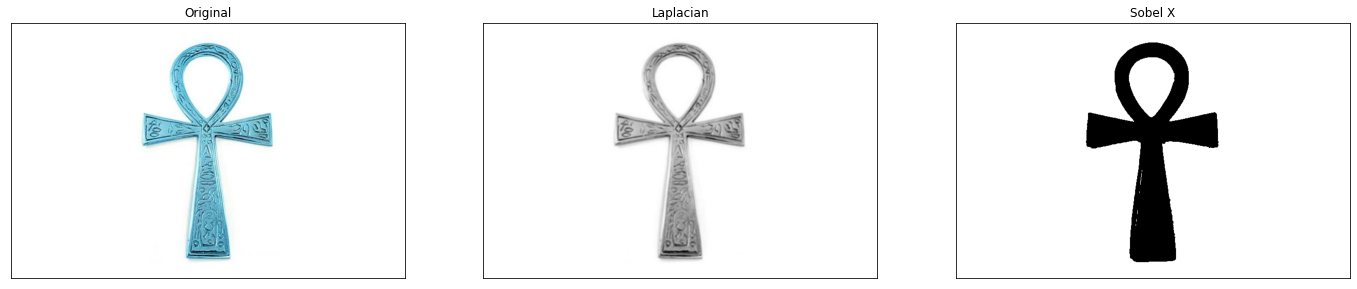

In [3]:
im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,245,255,0)

kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
# opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap= 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


In [4]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 1, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 8, (255,0,0), 3)

In [5]:
len(contours)

9

In [6]:
size =[]
for i in range(len(contours)):
    print(contours[i].shape)

(4, 1, 2)
(507, 1, 2)
(2, 1, 2)
(2, 1, 2)
(2, 1, 2)
(2, 1, 2)
(10, 1, 2)
(2, 1, 2)
(152, 1, 2)


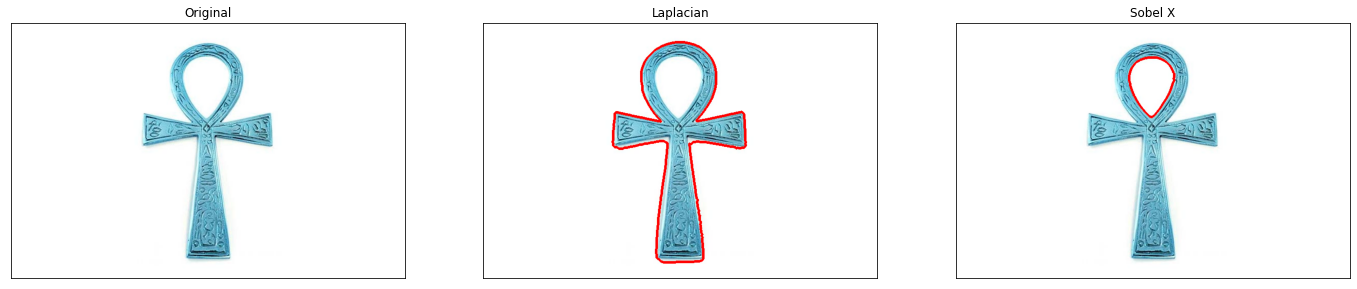

In [7]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap= 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
print(len(contours))

9


In [9]:
size = []
for i in range(len(contours)):
    size.append((i,contours[i].shape[0]))

In [10]:
print(size)

[(0, 4), (1, 507), (2, 2), (3, 2), (4, 2), (5, 2), (6, 10), (7, 2), (8, 152)]


In [11]:
cnt = contours[8]
M = cv2.moments(cnt)
print(M)

{'m00': 7156.0, 'm10': 2729142.6666666665, 'm01': 856205.0, 'm20': 1043988704.0, 'm11': 326443215.0, 'm02': 107965464.33333333, 'm30': 400560827086.2, 'm21': 124822453564.09999, 'm12': 41152419989.4, 'm03': 14273721110.300001, 'mu20': 3153084.237500906, 'mu11': -94738.73299795389, 'mu02': 5521780.428218737, 'mu30': 1219896.044494629, 'mu21': -17015031.69357133, 'mu12': -587792.1546669006, 'mu03': 34464205.24023056, 'nu20': 0.061573651553546015, 'nu11': -0.0018500646652129821, 'nu02': 0.10782971796269142, 'nu30': 0.00028160930020678293, 'nu21': -0.0039278684358779814, 'nu12': -0.00013569003530243992, 'nu03': 0.00795595720117691}


In [12]:
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [13]:
print(approx)

[[[393  69]]

 [[374  69]]

 [[373  70]]

 [[369  70]]

 [[368  71]]

 [[366  71]]

 [[365  72]]

 [[363  72]]

 [[362  73]]

 [[360  73]]

 [[358  75]]

 [[357  75]]

 [[356  76]]

 [[353  77]]

 [[348  82]]

 [[348  83]]

 [[345  86]]

 [[345  87]]

 [[343  89]]

 [[343  90]]

 [[341  93]]

 [[341  95]]

 [[340  96]]

 [[340  98]]

 [[339  99]]

 [[339 102]]

 [[338 103]]

 [[338 115]]

 [[339 116]]

 [[339 118]]

 [[340 119]]

 [[340 124]]

 [[341 125]]

 [[341 127]]

 [[342 128]]

 [[342 130]]

 [[343 131]]

 [[343 133]]

 [[345 136]]

 [[345 138]]

 [[347 141]]

 [[347 143]]

 [[349 145]]

 [[349 146]]

 [[350 147]]

 [[350 148]]

 [[351 149]]

 [[352 152]]

 [[354 154]]

 [[355 157]]

 [[357 159]]

 [[357 160]]

 [[359 162]]

 [[359 163]]

 [[362 166]]

 [[362 167]]

 [[367 172]]

 [[367 173]]

 [[378 184]]

 [[379 184]]

 [[380 185]]

 [[383 185]]

 [[385 183]]

 [[386 183]]

 [[390 179]]

 [[390 178]]

 [[394 174]]

 [[394 173]]

 [[398 169]]

 [[398 168]]

 [[402 163]]

 [[403

In [14]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0,(cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
img1 = cv2.drawContours(img1, approx, 0, (255,0,0), 3)

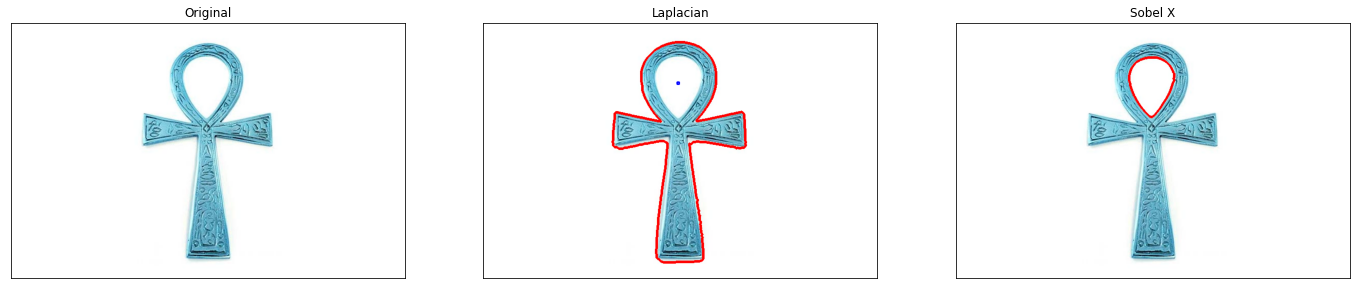

In [15]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap= 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
hull = cv2.convexHull(approx)

In [17]:
x,y,w,h = cv2.boundingRect(cnt)

In [18]:
rect = cv2.minAreaRect(cnt)